# ASTH-19 Group Project
This notebook is for the Astro-19 group project.

Authors: Jack O'Brien, Leo Constantine, Verónica Sánchez M. Thomas Liao

In [16]:
# In this cell, we include libraries
import astropy
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import math

Now, we're parsing the file. It will be returned as two lists containing data from each of the columns.

In [17]:
data_txt = open("Programming Final Group Project/ASTR19_F23_group_project_data.txt", 'r')

In [18]:
def ParseFile(_Filename:str = "dataset.txt"):
    
#     # Firstly, read it into a list line by line
#     Lines:list = []
#     with open(_Filename, "r") as F:
#         for Line in F:
#             Lines.append(Line)
    
#     # Now, remove those that start with a '#'
#     FilteredLines:list = []
#     for Line in Lines:
#         if "#" not in Line:
#             FilteredLines.append(Line)
            
#     # Now parse into arrays
#     Column0:list = []
#     Column1:list = []
#     Column2:list = []
#     for Line in FilteredLines:
#         Column0.append(Line[:3].replace(" ", ""))
#         Column1.append(Line[4:9])
#         Column2.append(Line[10:].strip("\n"))
           
    data_txt = open(_Filename, "r")
    
    Column0 = []
    Column1 = []
    Column2 = []
    for line in data_txt.readlines():
        cols = line.split()
        Column0.append(float(cols[0]))
        Column1.append(str(cols[1]))
        Column2.append(float(cols[2]))
    
    data_txt.close()
    
    # Return arrays
    return Column0, Column1, Column2


Now, we are going to parse the times in terms of seconds, then sort it based on time.

In [19]:
def SortTimes(_Days:list, _Times:list, _Height:list):
    
    # Firstly, we enumerate times, and convert from hh:mm to seconds
    TimeSeconds:list = []
    for i in range(len(_Times)):
        Day = int(_Days[i]) - 1 # days start at 1, not 0
        Hours = int(_Times[i].split(":")[0])
        Minutes = int(_Times[i].split(":")[1])
        Seconds = (Day * 3600 * 24) + (Hours * 3600) + (Minutes * 60)
        TimeSeconds.append(Seconds)
        
    # Build Tuple For Sorting
    TimePairs:list = []
    for i in range(len(_Height)):
        CurrentTime_s = TimeSeconds[i]
        Height = _Height[i]
        TimePairs.append((CurrentTime_s, float(Height)))
    
    # Now Sort it
    TimePairs = sorted(TimePairs)
    
    # Now resplit it
    XValues = []
    YValues = []
    for Pair in TimePairs:
        XValues.append(Pair[0]/(3600))

        YValues.append(Pair[1])
    
    
    
    return XValues, YValues

In [20]:
def PlotTidalWave(_Timestamps:list, _Waveheights:list):
    plt.plot(_Timestamps, _Waveheights)
    plt.xlabel("Elapsed Time since start (hours)")
    plt.ylabel("Wave height (feet)")
    plt.title("Tidal Wave")

In [21]:
def Model(x, a, b, c, d, e, f, g, h, i):
    return (np.cos(a*x + h)*b + f) * (np.sin(c*x + i)*d + g) + e

In [22]:
def OptimizeModel(_XValues:list, _YValues:list, _Function:object):
    return scipy.optimize.curve_fit(_Function, _XValues, _YValues, p0=[0.017, 6, 0.221, 5, 1, 1, 1, 1, 1], maxfev=100000)

In [23]:
def PerformCurveFit(_XValues:list, _YValues:list):
    
    _XValues = np.asarray(_XValues)
    _YValues = np.asarray(_YValues)
    
    
        
    NumSamples:int = 4000
    DetailedXValues:list = np.linspace(0, np.max(_XValues), NumSamples)
    DetailedYValues:list = np.interp(DetailedXValues, _XValues, _YValues)
    
    y_err = np.full_like(DetailedYValues, 0.25)
    
    BestParams:list = []
    BestError:float = 9999999
    for b in range(-5, 5):
        for d in range(-5, 5):
            for a in range(0, 2):


                OptimizedParameters, ErrorValues = scipy.optimize.curve_fit(Model, DetailedXValues, DetailedYValues, p0=[a/20, 8, 0.221, 10, 1, 1, 1,  b/10,  d/10], sigma=y_err, maxfev=100000)

                ErrorArray = np.sqrt(np.diag(ErrorValues))
                AvgError = np.average(ErrorArray)

                if (AvgError < BestError):
                    print(f"New Best Err: {AvgError}")
                    BestError = AvgError
                    BestParams = OptimizedParameters

    
    print(BestParams)
    plt.plot(DetailedXValues, DetailedYValues)
    plt.plot(DetailedXValues, Model(DetailedXValues, *BestParams.tolist()))

[ 0.24374865  3.58587749  0.01832275  0.47826665  2.67587002 -0.69786201
  0.27647912  5.24855634  0.71506493]
334964.27305367327


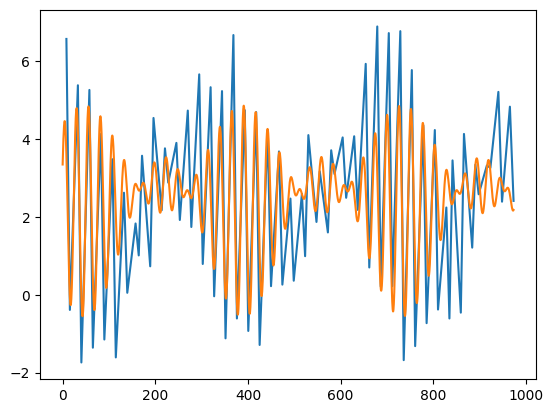

In [24]:
def Main():
    Days, TimesRaw, WaveHeights = ParseFile("Programming Final Group Project/ASTR19_F23_group_project_data.txt")
    Timestamps, WaveHeights = SortTimes(Days, TimesRaw, WaveHeights)

    # Make Initial Plot
    #PlotTidalWave(Timestamps, WaveHeights)
    
    #PerformCurveFit(Timestamps, WaveHeights)
    
    
    _XValues = np.asarray(Timestamps)
    _YValues = np.asarray(WaveHeights)
    
    
    NumSamples:int = 4000
    DetailedXValues:list = np.linspace(0, np.max(_XValues), NumSamples)
    DetailedYValues:list = np.interp(DetailedXValues, _XValues, _YValues)
    
    y_err = np.full_like(DetailedYValues, 0.25)
    

    OptimizedParameters, ErrorValues = scipy.optimize.curve_fit(Model, DetailedXValues, DetailedYValues, p0=[0.25, 0.5, 0.017, 1.8, 2, 1, 1,  0,  2.2], sigma=y_err, maxfev=100000)

# OptimizedParameters = np.asarray([0.25, 0.5, 0.017, 1.8, 2, 1, 1,  0,  2.2])

    ErrorArray = np.sqrt(np.diag(ErrorValues))
    AvgError = np.average(ErrorArray)

    
    print(OptimizedParameters)
    print(AvgError)
    plt.plot(Timestamps, WaveHeights)
    plt.plot(DetailedXValues, Model(DetailedXValues, *OptimizedParameters.tolist()))
    
    
    


if __name__ == "__main__":
    Main()

In [25]:
# Define the model function
def model_function(t, A, omega, phi, offset):
    return A * np.sin(omega * t + phi) + offset

In [26]:
# Fit the model to the data
p0 = [np.max(tides), 2*np.pi/365, 0, np.mean(tides)]
params, covariance = curve_fit(model_function, days, tides, p0=p0, sigma=0.25)

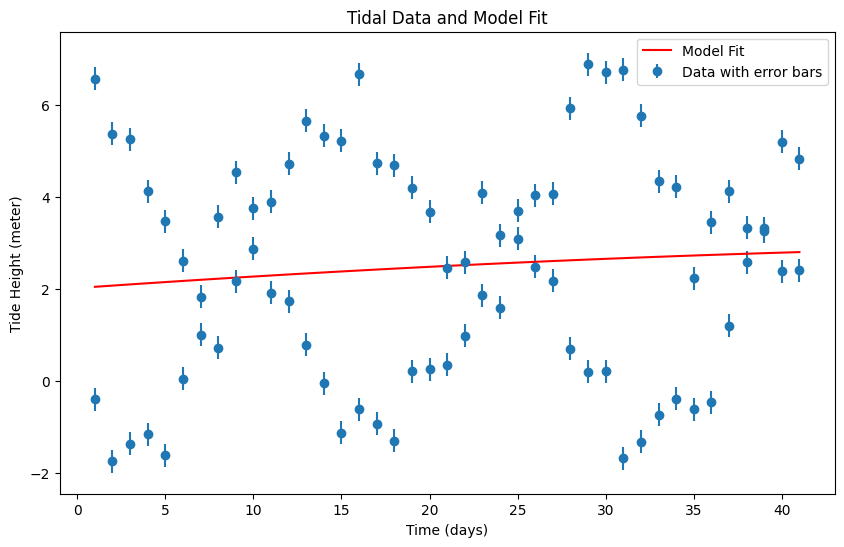

In [27]:
# Plot the data and model
plt.figure(figsize=(10, 6))
plt.errorbar(days, tides, yerr=0.25, fmt='o', label='Data with error bars')
plt.plot(days, model_function(np.array(days), *params), label='Model Fit', color='red')
plt.xlabel('Time (days)')
plt.ylabel('Tide Height (meter)')
plt.legend()
plt.title('Tidal Data and Model Fit')
plt.savefig('tidal_data_and_model_fit.pdf')
plt.show()

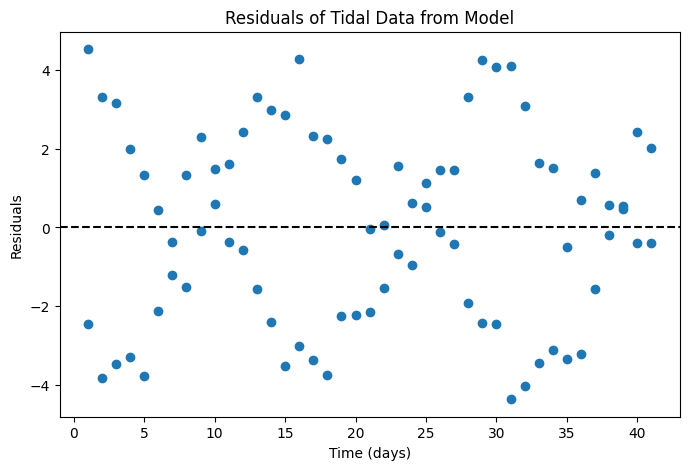

In [28]:
# Calculate and plot residuals
residuals = tides - model_function(np.array(days), *params)
plt.figure(figsize=(8, 5))
plt.plot(days, residuals, marker='o', linestyle='None')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Residuals')
plt.title('Residuals of Tidal Data from Model')
plt.savefig('tidal_residuals.pdf')
plt.show()

In [29]:
# Calculate standard deviation of residuals
std_dev_residuals = np.std(residuals)

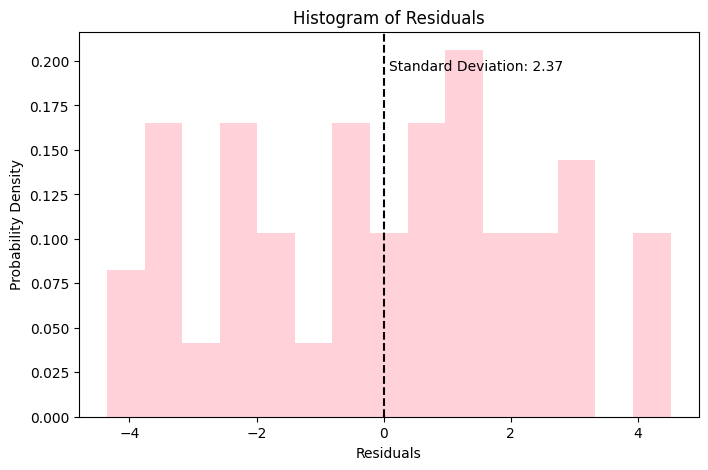

In [36]:
# Plot histogram of residuals
plt.figure(figsize=(8, 5))
count, bins, ignored = plt.hist(residuals, bins=15, density=True, alpha=0.7, color='pink', label='Residuals')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals')
plt.text(0.5, 0.9, f'Standard Deviation: {std_dev_residuals:.2f}', transform=plt.gca().transAxes)
plt.savefig('histogram_residuals.pdf')
plt.show()

In [31]:
# Calculate the deviation of the tsunami (2ft) in terms of standard deviations
tsunami_deviation = 2 / std_dev_residuals
print(f"Deviation of tsunami (2ft) from normal tides: {tsunami_deviation:.2f} standard deviations")

Deviation of tsunami (2ft) from normal tides: 0.84 standard deviations


In [32]:
# Add the outlier to the data and replot histogram
outlier = 2.0  # 2ft outlier
tides_with_outlier = tides + [outlier]

In [33]:
# Ensure tides_with_outlier has the same length as days
if len(tides_with_outlier) != len(days):
    tides_with_outlier = tides_with_outlier[:-1]

In [34]:
# Calculate new residuals
residuals_outlier = tides_with_outlier - model_function(np.array(days), *params)

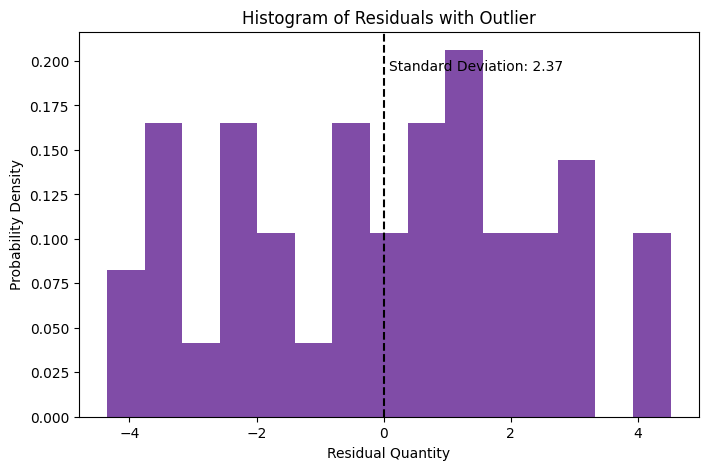

In [37]:
# Plot histogram with outlier
plt.figure(figsize=(8, 5))
count, bins, ignored = plt.hist(residuals_outlier, bins=15, density=True, alpha=0.7, color='indigo', label='Residuals with Outlier')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Residual Quantity')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals with Outlier')
plt.text(0.5, 0.9, f'Standard Deviation: {std_dev_residuals:.2f}', transform=plt.gca().transAxes)
plt.savefig('histogram_residuals_with_outlier.pdf')
plt.show()